In [9]:
from NotebookModule import *
roms_datafile="../../data/roms/Oregon_Slope_Base_2021.01.01_2021.12.31.nc"

In [2]:
# Inspection phase
s=xr.open_dataset(roms_datafile)
s

<xarray.Dataset>
Dimensions:        (ocean_time: 8761, s_w: 31, s_rho: 30)
Coordinates:
    lat_rho        float64 ...
    lat_u          float64 ...
    lat_v          float64 ...
    lon_rho        float64 ...
    lon_u          float64 ...
    lon_v          float64 ...
  * ocean_time     (ocean_time) datetime64[ns] 2021-01-01 ... 2022-01-01
  * s_rho          (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w            (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
Data variables: (12/38)
    AKs            (ocean_time, s_w) float32 ...
    AKv            (ocean_time, s_w) float32 ...
    Cs_r           (s_rho) float64 ...
    Cs_w           (s_w) float64 ...
    Ldetritus      (ocean_time, s_rho) float32 ...
    NO3            (ocean_time, s_rho) float32 ...
    ...             ...
    vbar           (ocean_time) float32 ...
    w              (ocean_time, s_w) float32 ...
    zeta           (ocean_time) float32 ...
    zooplankton    (ocean_time, s_rho) float32 ...
    z_rho          (ocean_time, s_rho) float64 ...
    z_w            (ocean_time, s_w) float64 ...
Attributes: (12/43)
    file:                   /gscratch/macc/parker/LiveOcean_roms/output/cas6_...
    format:                 netCDF-4
    Conventions:            CF-1.4, SGRID-0.3
    type:                   ROMS/TOMS history file
    title:                  First LiveOcean input file
    var_info:               /gscratch/macc/parker/LiveOcean_roms/LO_ROMS/ROMS...
    ...                     ...
    ana_file:               ROMS/Functionals/ana_btflux.h, ROMS/Functionals/a...
    bio_file:               ROMS/Nonlinear/Biology/npzd2o_banas.h
    CPP_options:            LO8B, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLU...
    NCO:                    netCDF Operators version 4.9.8 (Homepage = http:/...
    nco_input_file_number:  8761
    nco_input_file_list:    moor_temp_000000.nc moor_temp_000001.nc moor_temp...

In [44]:
s.zooplankton


<xarray.DataArray 'zooplankton' (ocean_time: 8761, s_rho: 30)>
[262830 values with dtype=float32]
Coordinates:
    lat_rho     float64 44.53
    lat_u       float64 44.53
    lat_v       float64 44.54
    lon_rho     float64 -125.4
    lon_u       float64 -125.4
    lon_v       float64 -125.4
  * ocean_time  (ocean_time) datetime64[ns] 2021-01-01 ... 2022-01-01
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
Attributes:
    long_name:     zooplankton concentration
    units:         millimole_nitrogen meter-3
    time:          ocean_time
    grid:          grid
    location:      face
    field:         zooplankton, scalar, series
    cell_methods:  ocean_time: mean

In [30]:
# getting out the 30 'rho' cell-center water column depths
#   negative down from 0; notice order is from seafloor to surface
time_index = 2700      # arbitrary
for i in [0, 1, 2, 3, 4, 25, 26, 27, 28, 29]:
    print(s.z_rho[17][i].data)

-2871.245108889523
-2727.372688756239
-2569.4996189028075
-2401.0827602746313
-2225.807907830217
-49.135333725741646
-29.825412488138365
-15.479155217876974
-5.908780558473932
-0.9888833421403472


In [31]:
# s.shflux is surface net heat flux
# s.swrad is solar shortwave radiation flux
# s.zeta is free surface (height relative to mean)
# s.NO3 is nitrate concentration (millimole_nitrogen meter-3)
# s.phytoplankton is phytoplankton concentration (millimole_nitrogen meter-3)
# s.rho is density anomaly (kg m-3)
# s.salt is salinity (g kg-1)


--------------------time step of mooring--------------------
3600.0
------------------------time limits-------------------------
start 2021-01-01 00:00:00
end   2022-01-01 00:00:00
----------------------------info----------------------------
AKs                  ( salinity vertical diffusion coefficient ) (8761, 31)
AKv                  ( vertical viscosity coefficient ) (8761, 31)
Cs_r                 ( S-coordinate stretching curves at RHO-points ) (30,)
Cs_w                 ( S-coordinate stretching curves at W-points ) (31,)
Ldetritus            ( Ldetritus concentration ) (8761, 30)
NO3                  ( nitrate concentration ) (8761, 30)
Pair                 ( surface air pressure ) (8761,)
TIC                  ( total inorganic carbon ) (8761, 30)
Uwind                ( surface u-wind component ) (8761,)
Vwind                ( surface v-wind component ) (8761,)
alkalinity           ( total alkalinity ) (8761, 30)
bustr                ( bottom u-momentum stress ) (8761,)
bvstr  

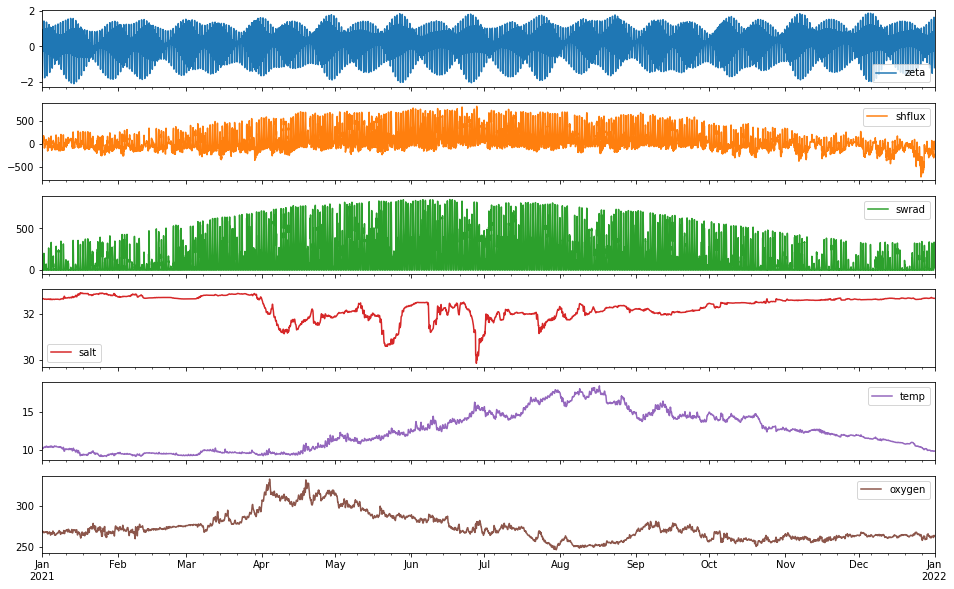

In [45]:
# Modified version of Parker's code; key features:
#   renamed Parker's T as 'Tpm' to avoid collisions

ds = xr.load_dataset(roms_datafile)
ot = ds.ocean_time.values
ot_dt = pd.to_datetime(ot)
t = (ot_dt - ot_dt[0]).total_seconds().to_numpy()
Tpm = t/86400 # time in days from start

print('time step of mooring'.center(60,'-'))
print(t[1])
print('time limits'.center(60,'-'))
print('start ' + str(ot_dt[0]))
print('end   ' + str(ot_dt[-1]))
print('info'.center(60,'-'))

VN_list = []
for vn in ds.data_vars:
    if not (vn == 'z_rho' or vn == 'z_w'):
        vnlj = vn.ljust(20, ' ')
        print('%s ( %s ) %s' % (vnlj, ds[vn].long_name, ds[vn].shape))
        VN_list.append(vn)
    
# populate lists of variables to plot
vn2_list = ['zeta']
if 'shflux' in VN_list:
    vn2_list += ['shflux', 'swrad']
vn3_list = []
if 'salt' in VN_list:
    vn3_list += ['salt', 'temp']
if 'oxygen' in VN_list:
    vn3_list += ['oxygen']

# plot time series using a pandas DataFrame
df = pd.DataFrame(index=ot)
for vn in vn2_list:
    df[vn] = ds[vn].values
for vn in vn3_list:
    # the -1 means surface values (order 0...-1 is from seafloor to surface)
    df[vn] = ds[vn][:, -1].values

plt.close('all')
df.plot(subplots=True, figsize=(16,10))
plt.show()

### Parker's chart code

Compressed a bit for space. Modified version is used above to produce those charts. 


```
"""
Stand-alone code to plot a user-specified mooring extraction.
"""
from pathlib import Path
moor_fn = Path('...etcetera....nc')
import xarray as xr, matplotlib.pyplot as plt, pandas as pd, numpy as np

# load everything using xarray
ds = xr.load_dataset(moor_fn)
ot = ds.ocean_time.values
ot_dt = pd.to_datetime(ot)
t = (ot_dt - ot_dt[0]).total_seconds().to_numpy()
T = t/86400 # time in days from start
print('time step of mooring'.center(60,'-'))
print(t[1])
print('time limits'.center(60,'-'))
print('start ' + str(ot_dt[0]))
print('end   ' + str(ot_dt[-1]))
print('info'.center(60,'-'))
VN_list = []
for vn in ds.data_vars:
    print('%s %s' % (vn, ds[vn].shape))
    VN_list.append(vn)
    
# populate lists of variables to plot
vn2_list = ['zeta']
if 'shflux' in VN_list:
    vn2_list += ['shflux', 'swrad']
vn3_list = []
if 'salt' in VN_list:
    vn3_list += ['salt', 'temp']
if 'oxygen' in VN_list:
    vn3_list += ['oxygen']

# plot time series using a pandas DataFrame
df = pd.DataFrame(index=ot)
for vn in vn2_list:
    df[vn] = ds[vn].values
for vn in vn3_list:
    # the -1 means surface values
    df[vn] = ds[vn][:, -1].values

plt.close('all')
df.plot(subplots=True, figsize=(16,10))
plt.show()
```